#  Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

# 1 a) Brownian Motion

We will make a simultation of a particle's random motion in two dimensions with length given by L. The particle starts in the middle of the grid and moves in random directions. For random moves, we wil use the random package to generate random number and make the particle moves according to those random numbers. We will set the L=101 and the total number of step to be 5000 steps, and when the particle reaches the boundary, we will make it to move in the random direction so that it does not travel pass the boundary. We will record the trajectory of a particle and plot it.

In [1]:
#import module
import numpy as np
from random import randrange #import randrange to create the random number
from pylab import plot,xlim,ylim,xlabel,ylabel,title,show,clf,pause,draw

We will define a funtion to for plotting the whole trajecctory of a particle which went through random walk.
First, use the randrange to create the random number from 1 to 4 and assign the specific motion to particle corresponding to each number. And at each steps, record the position of the particle and plot it at the end. 

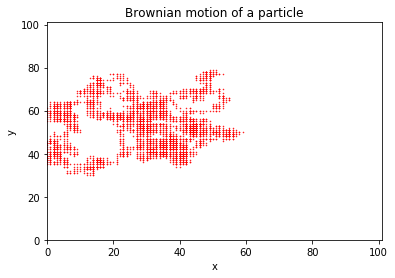

In [2]:
# Create function to produce plot of trajectory of a particle
def nextmove(Nt):
    """ randomly choose a direction
    1 = up, 2 = down, 3 = left, 4 = right"""
    
    L=101 # number of grids  (length of the boundary)
    centre_point = (L-1)//2  # middle point of domain
    # assgin the starting point
    x = centre_point 
    y = centre_point
    # arrays to record the trajectory of the particle
    trajectory=[[],[]] 
    
    # loop until particle moves Nt(=5000) steps
    for i in range(Nt):
        
        #create random number between 1 and 4
        direction =  randrange(1,5,1)
        if direction == 1:  
            #when particle hit the boundary, go to the new iteration for another random motion
            if y==L: continue 
            y += 1 # move up
        elif direction == 2:
            #when particle hit the boundary, go to the new iteration for another random motion
            if y==0: continue
            y -= 1 # move down
        elif direction == 3:
            #when particle hit the boundary, go to the new iteration for another random motion
            if x==L: continue
            x += 1 # move right
        elif direction == 4:
            #when particle hit the boundary, go to the new iteration for another random motion
            if x==0: continue
            x -= 1 # move left
        trajectory[0].append(x) #record the trajectory of a particle
        trajectory[1].append(y)
    #plot total trajectory of particle
    plot(trajectory[0],trajectory[1],".r",markersize=1)
    #set up the plot 
    xlim(0,101)
    ylim(0,101)
    title('Brownian motion of a particle')
    xlim([0, L])
    ylim([0, L])
    xlabel('x')
    ylabel('y')
    show()

Nt = 5000  # number of time steps
nextmove(Nt) #show the plot

# Note: If we want to see an animation, simply indent the plotting
# commands up one level to be inside the loop, then the graph will
# update, 'drawing' the line. Run in spyder or through terminal.

# 1 b,c) Diffusion-limited aggregation

In this exercise, we will take a square gird with a single particle in the middle. The particle performs a random walk from square to square on the grid unitl it reaches a point on the edge of the system, at which it sticks to the edge, becoming anchored there and immovable, then a second particle starts at the center and moves randomly until it sticks either to an edge or to the other particle. And repeat the process.

# b) 
We will use 100 particles and write the code for the animation.
First define a function which make the particle move randomly.

In [3]:
def nextmove(x, y):
    """ randomly choose a direction
    1 = up, 2 = down, 3 = left, 4 = right"""
    direction =  randrange(1,5,1)

    if direction == 1:  # move up
        y += 1
    elif direction == 2:  # move down
        y -= 1
    elif direction == 3:  # move right
        x += 1
    elif direction == 4:  # move left
        x -= 1
    return x, y

Set up the initial conditions of the problems

In [4]:
L = 101 # size of domain
N = 100  # number of particles
# array to represent the coordinate of anchored points
anchored = np.zeros((N, 2))-1 #-1 is to get rid of the [0,0] point in the animation
centre_point = (L-1)//2  # middle point of domain

Main program: We will basically have three conditions. First, if the particle hit the boundary, it is anchored there. Second, if particle hit the other anchored particle, it is also anchored next to that particle. Third, if particles piled up and occupy the center point, the animation stops running because any further particles added will be anchored the moment they start out. And for the speed, we will only show the motion of particle after 50 steps.

In [7]:
#Loop until all the particles are anchored
for j in range(N):
    xp,yp=centre_point,centre_point
    i=0 #set the count number for animation
    xpp,ypp=xp,yp
        #Loop (or move) the particle until it hit the boundary or the other 
        #anchored particles
    while xpp < L and ypp < L and xpp > 0 and ypp > 0 and\
    ([xpp+1,ypp] not in anchored and [xpp-1,ypp] not in anchored \
     and [xpp,ypp+1] not in anchored and [xpp,ypp-1] not in anchored):            
        xpp, ypp = nextmove(xp, yp) #move the particle in random motion
        xp, yp = xpp, ypp
        i+=1 #increase the count number 
        #show the animation every 50 steps
        if i%animation_interval==0:
            #assign the x and y coordinate the new array for plot
            for i in range(len(anchored)):
                anchored_points[0].append(anchored[i][0])
                anchored_points[1].append(anchored[i][1])
            #show the animation
            clf() 
            plot(xp,yp,".b")
            plot(anchored_points[0],anchored_points[1], '.')
            title('Diffusion-limited aggregation run for 100 particles')
            xlim([0, L])
            ylim([0, L])
            xlabel('x')
            ylabel('y')
            pause(0.005)
            draw()
    # if particle hit the boundary or other anchored particles, store the location
    anchored.append([xp,yp]) 

# (c) 
Modify the program so that it shows only anchored particles on the screen. Set up the program so that is stops running once there is an anchored particle in the center of the grid. We will make the lattice with 151* 151.

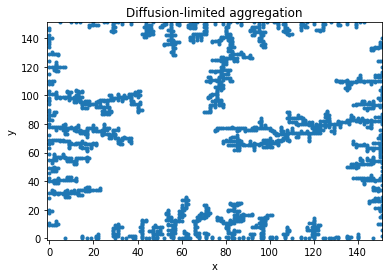

In [5]:
L = 151# size of domain

# array to represent the coordinate of anchored points
anchored = []
#array for the plot at the end
anchored_points = [[],[]]
centre_point = (L-1)//2  # middle point of domain

#loop unitil there is a anchored particle at the center
while [centre_point,centre_point] not in anchored:
    #set the initial start point in the middle of the grid
    xp,yp=centre_point,centre_point
    xpp,ypp=xp,yp
        #Loop (or move) the particle until it hit the boundary or the other 
        #anchored particles
    while xpp < L and ypp < L and xpp > 0 and ypp > 0 and\
    ([xpp+1,ypp] not in anchored and [xpp-1,ypp] not in anchored \
     and [xpp,ypp+1] not in anchored and [xpp,ypp-1] not in anchored):            
        #move the particle in random motion
        xpp, ypp = nextmove(xp, yp) 
        xp, yp = xpp, ypp
    #store the position of anchored particles
    anchored.append([xp,yp])    

#assign the x and y coordinate the new array for plot

for i in range(len(anchored)):
    anchored_points[0].append(anchored[i][0])
    anchored_points[1].append(anchored[i][1])
    
#plot the graph

plot(anchored_points[0],anchored_points[1], '.')
title('Diffusion-limited aggregation')
xlabel('x')
xlim([-1, L])
ylim([-1, L])
ylabel('y')
show()

#  Question 2 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

# Volume of a 10-dimensional Hypersphere

We will calculate the volume of 10-d hypershpere using Monte Carlo method (Hit or miss).
THe hypersphere has unit radius and the actual value is given by the Formula:
\begin{align}
V= \frac{\pi^{5}}{\Gamma(6)} && where&& \Gamma(6)=5! \\ &&V \approx 2.55016403988
\end{align}
We will use the 1 million points to get a good estimate of the volume of hypersphere.
Monte Carlo integration(Hit or miss) gives an approximated answer by following:
Let the Area bounding 10d-rectangle surrounding 10d-hypersphere call 'A'.
If we choose a point uniformly at random in the 10d-rectangle,the probability that point falls in the hypersphere is p=I/A where I is the volume of the hypersphere we want to calculate.Therefore, we will generate a large number N=1000000 of random points in the bounding rectangle, check each one to see if it's inside the hypersphere and keep a count of the number (k). Then the fraction of points below the curve, which is k/N, should be approximately equal to the probability p, then:
\begin{align}
I\approx \frac{kA}{N}
\end{align}
The variance of distribution of k is given by
\begin{align}
var\ k=N\frac{I}{A}(1-\frac{I}{A})
\end{align}
Then the expected error sigma is given by
\begin{align}
\sigma=\frac{\sqrt{I(A-I)}}{\sqrt{N}}
\end{align}

Frist we will define function take random number between -1 and 1 in the form of matrix (dim* N),then the function will calculate the each
element^2 for 10 times and compare if each element is less than 0 and it is the element turns into True. Therefore output of function is array consist of Bool (Flase or True). Then we will finaly calculate the Volume of 10d hypersphere as:
\begin{align}
I\approx \frac{kA}{N}
\end{align}

In [6]:
from numpy.random import random
from numpy import zeros, sqrt
N = 1000000 #number of trial points
dim = 10 #dimension of sphere

def f(x):
	#create r array
	r = zeros(N,float)
	#loop for number of dimension which is 10
	for i in x:
        #calculate the sqaure of each dimension
		r += i**2
	#create the array of length N with boolean element
    #each element of r represent the 10d-radius 
	return r<1

#create random number between -1 and 1 
#in the form of matrix with dim*N (row*coloumn)
x = 2*random((dim,N)) - 1
#assign values to fx
fx = f(x)
# calcualte the volume of 10d hypercube
A=2**dim
#calculate volume of 10d hypersphere
I = A*sum(fx)/N
#calculate the error
sigma = sqrt(I*(A-I))/sqrt(N)
print("Volume of Hypersphere is about:",I)
print("The error is: ",sigma)

Volume of Hypersphere is about: 2.506752
The error is:  0.0506026703091
